# Parameters

Notebook for Parameters notes and exercise

Ultimately the goal of any machine learning model is to be able to predict as accurately as possible an output (y) based on a given input (x). The objective is to fit a regression line to the known data where x is the inpedendant variable and y is the dependant variable bases on some function of x. By evaluating a best fit function for x it allows for any value of y to be predicted to a degree of accuracy. 


1. What are parameters <br>
(https://www.geeksforgeeks.org/difference-between-model-parameters-vs-hyperparameters/)<br>
(https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/#:~:text=What%20is%20a%20Model%20Parameter,the%20model%20on%20your%20problem)

- In an equation such as y = 4x + 2, the "4" represents the slope of the line (m), i.e. for each successive value of x, y is 4 times that. the "2" in the equation represents where on the y axis the line crosses when x = 0, in this case 2 , or c. In this simple example the equation is the model, the 4 and 2 are the model parameters. 
- The challenge is given a set of data how to find the optimum parameters for the model function as these parameters have to be estimated from the data.

In [121]:
# Import the required libraries.
import numpy as np

import matplotlib.pyplot as plt

In [122]:
x = np.linspace(0,10,20)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [123]:
y = 6*x - 4 + np.random.normal(0,1,len(x))

y

array([-3.12826733, -1.35096182,  3.22528027,  6.66062183,  9.05019582,
        8.99046223, 16.1690554 , 16.45374053, 21.12111448, 24.48482437,
       26.70173878, 30.88259346, 33.60626541, 37.98873821, 38.63114453,
       43.33977441, 46.47161634, 49.57320934, 53.10288057, 55.21596117])

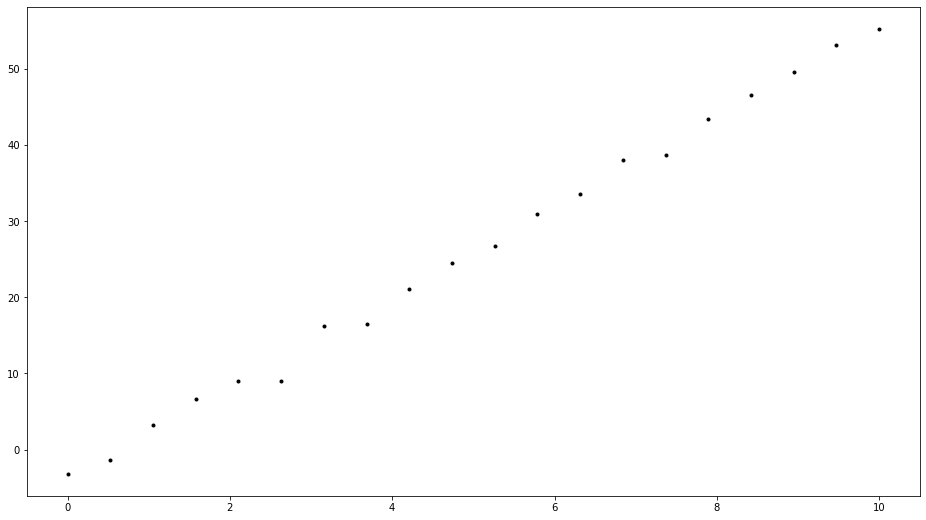

In [124]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.')

In [125]:
params = np.polyfit(x,y,3)


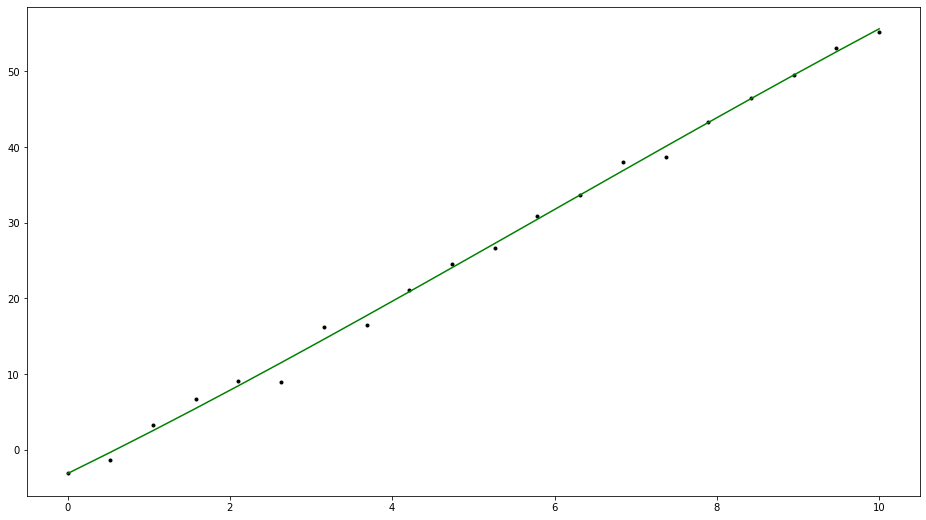

In [126]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.')

ax.plot(x,np.polyval(params,x) ,'g-')


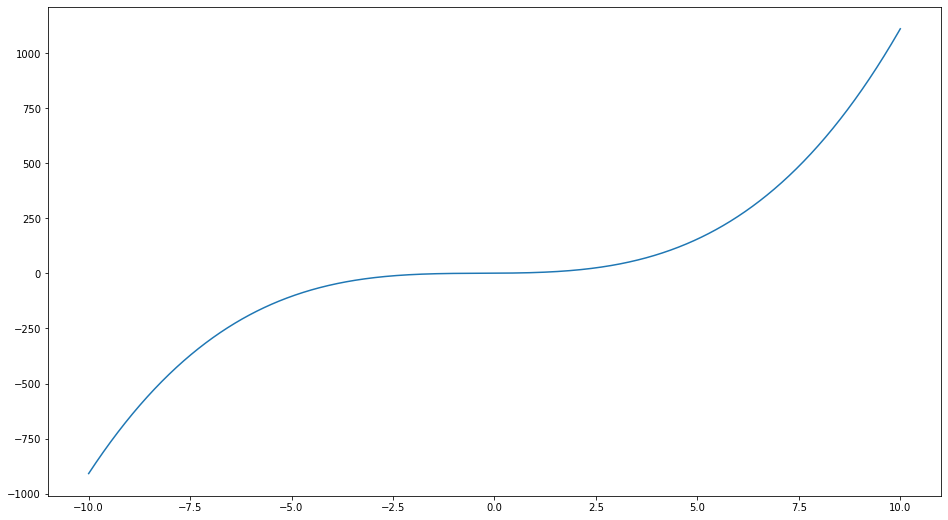

In [127]:
fig,ax = plt.subplots(figsize=(16,9))
xtemp = np.linspace(-10, 10, 1000)

y3 = xtemp**3 + xtemp**2 + xtemp + 1

ax.plot(xtemp,y3)

In [128]:
# Data Set 1
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

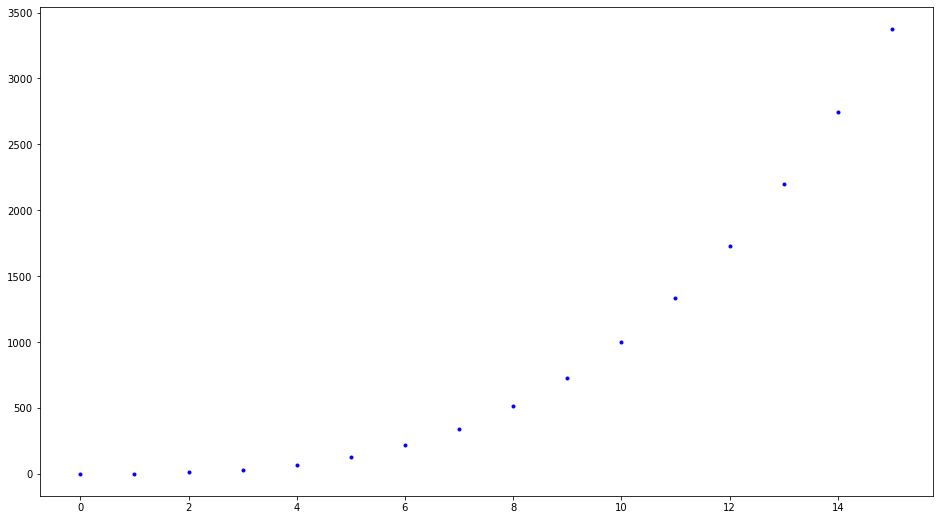

In [129]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x1,y1,'b.')


In [130]:
degree = 3
params1 = np.polyfit(x1,y1,degree)
params1

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])

In [131]:
y_fit = np.polyval(params1, x1)
y_fit

array([1.22298762e+00, 1.79391125e+00, 8.50242518e+00, 2.73304914e+01,
       6.42600718e+01, 1.25273129e+02, 2.16351623e+02, 3.43477518e+02,
       5.12632776e+02, 7.29799357e+02, 1.00095922e+03, 1.33209434e+03,
       1.72918667e+03, 2.19821816e+03, 2.74517079e+03, 3.37602652e+03])

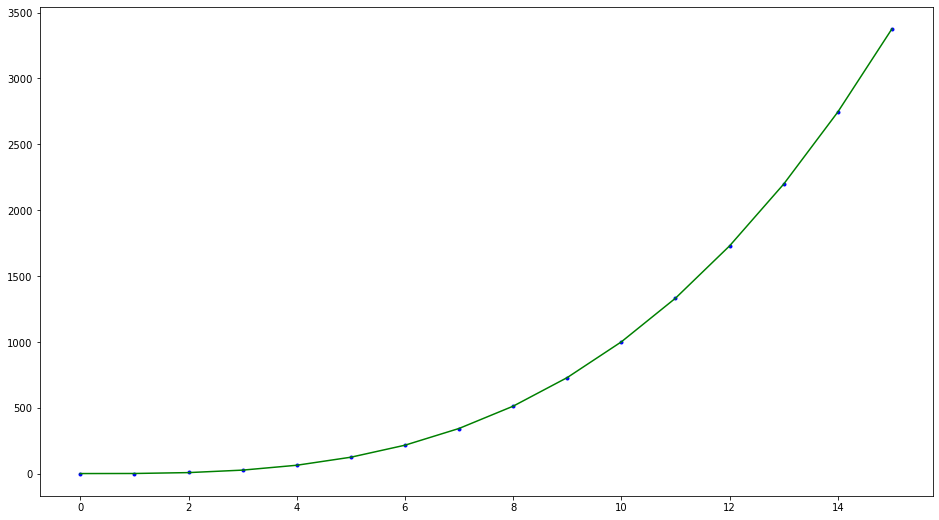

In [132]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x1, y1, 'b.')

ax.plot(x1, y_fit,'g-')

#ax.plot(x1, params1[0]*x1**3 + params1[1]*x1**2 + params1[2]*x1 + params1[3], 'g-')

In [142]:
x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

In [151]:
degree = 3
params2 = np.polyfit(x2,y2,degree)
params2

array([  404.99944639, -4071.44393107, 11220.5892649 , -4708.86456044])

In [152]:
y_fit = np.polyval(params2, x2)
y_fit

array([-4.70886456e+03,  2.84528022e+03,  4.68653382e+03,  3.24489291e+03,
        9.50354171e+02,  2.32914286e+02,  3.52256993e+03,  1.32493178e+04,
        3.18431545e+04,  6.17340768e+04,  1.05352081e+05,  1.65127165e+05,
        2.43489324e+05])

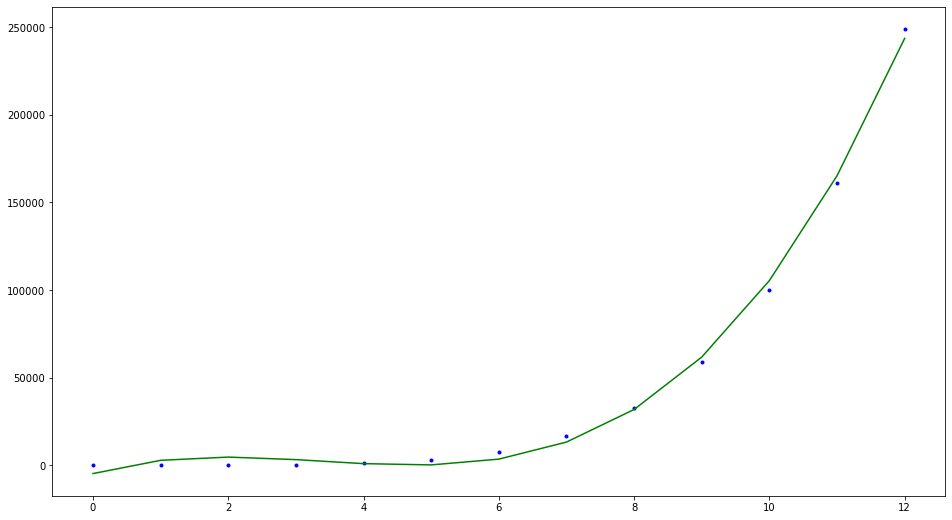

In [153]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x2, y2, 'b.')

ax.plot(x2, y_fit,'g-')